In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("BostonHousing.csv")

In [3]:
df.shape

(506, 14)

In [4]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

<AxesSubplot:>

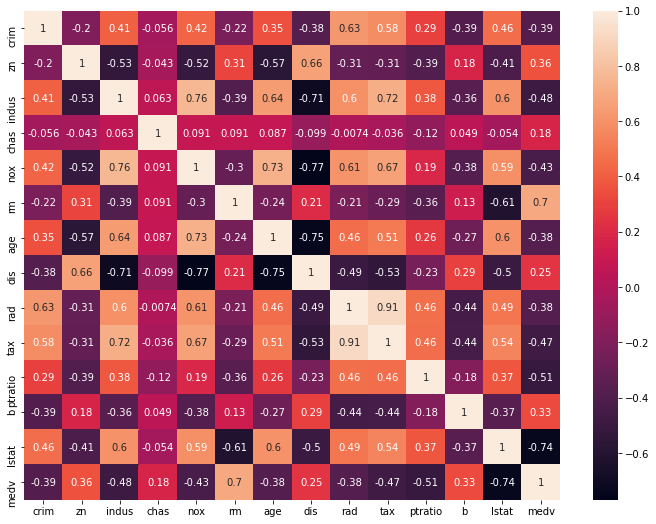

In [8]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(),annot=True)

In [9]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


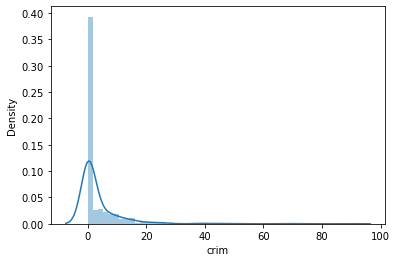

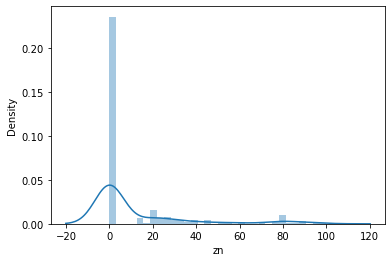

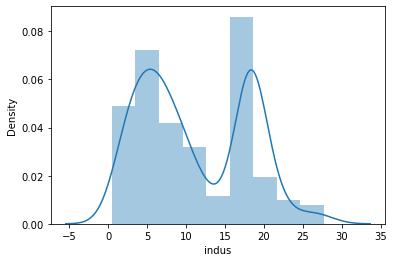

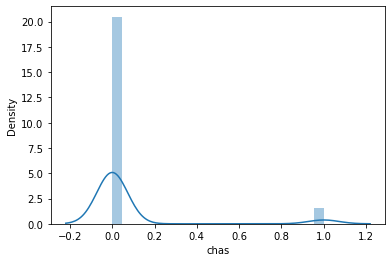

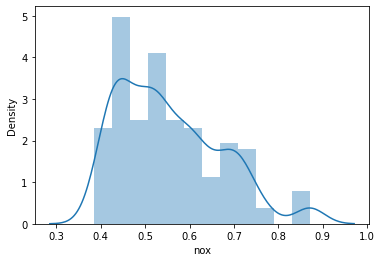

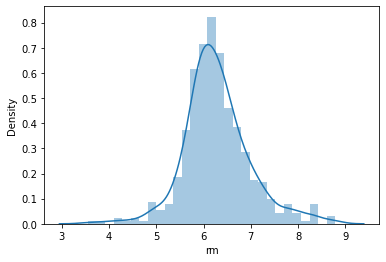

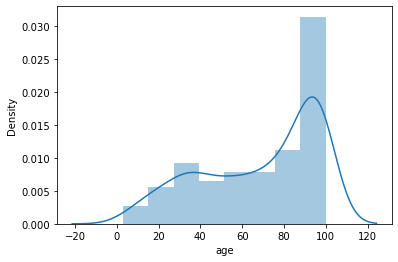

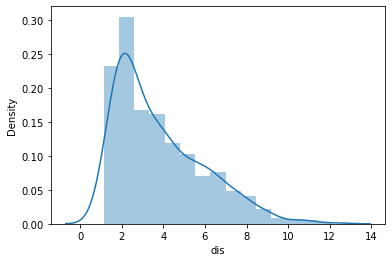

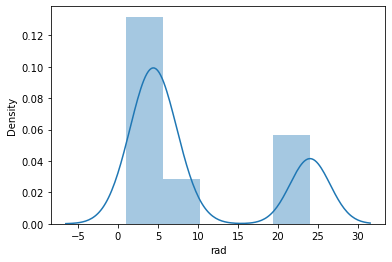

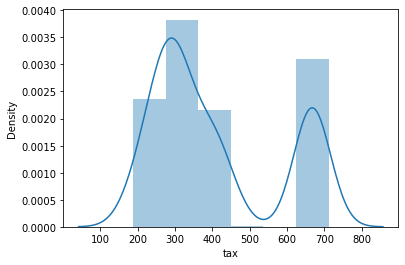

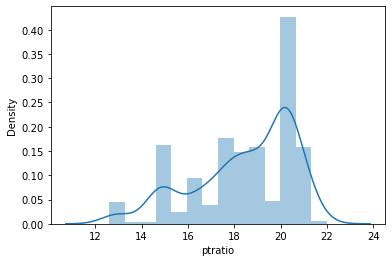

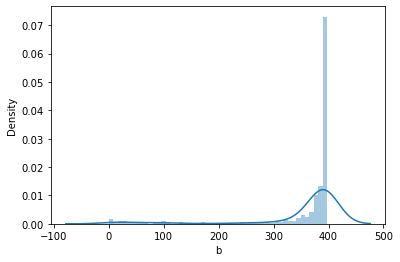

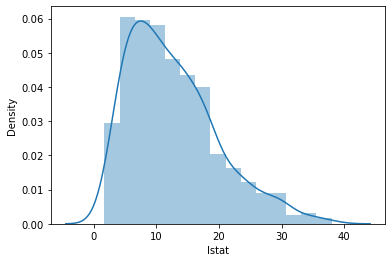

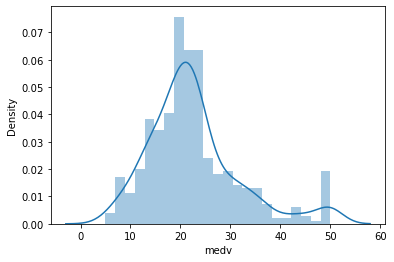

In [10]:
for col in df:
    plt.figure()
    sns.distplot(df[col])
    plt.show()

In [11]:
X = df.drop(["medv"],axis=1)
y = df['medv']

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [13]:
lr = LinearRegression()

In [14]:
lr.fit(X_train,y_train)

LinearRegression()

In [15]:
lr.coef_

array([-9.85424717e-02,  6.07841138e-02,  5.91715401e-02,  2.43955988e+00,
       -2.14699650e+01,  2.79581385e+00,  3.57459778e-03, -1.51627218e+00,
        3.07541745e-01, -1.12800166e-02, -1.00546640e+00,  6.45018446e-03,
       -5.68834539e-01])

In [16]:
lr.intercept_

46.39649387182351

In [17]:
y_pred = lr.predict(X_test)

In [18]:
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print("R2",r2_score(y_test,y_pred))

MSE 19.831323672062982
RMSE 4.453237437198132
MAE 3.344665503598758
R2 0.7836295385076308


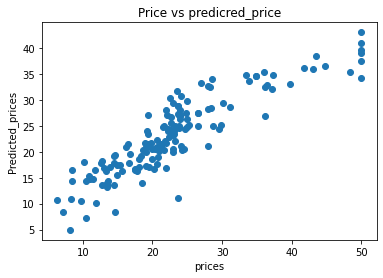

In [19]:
plt.figure()
plt.scatter(y_test,y_pred)
plt.xlabel("prices")
plt.ylabel("Predicted_prices")
plt.title("Price vs predicred_price")
plt.show()

In [20]:
#checking residuals
residuals = y_test-y_pred

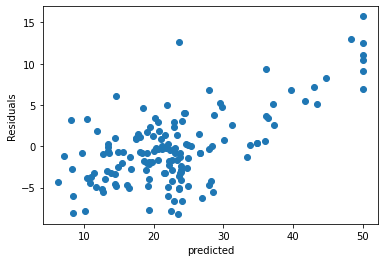

In [21]:
plt.figure()
plt.scatter(y_test,residuals)
plt.xlabel("predicted")
plt.ylabel("Residuals")
plt.show()

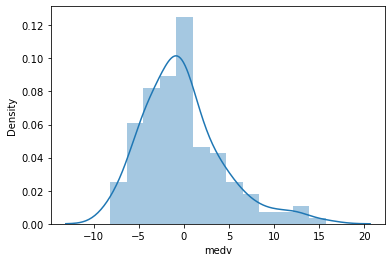

In [22]:
plt.figure()
sns.distplot(residuals)
plt.show()

# Second model

In [23]:
df1=pd.read_csv("BostonHousing.csv")

In [24]:
df1.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [26]:
X1 =df1.iloc[ :,:-1]
y1 =df1.iloc[:,-1]

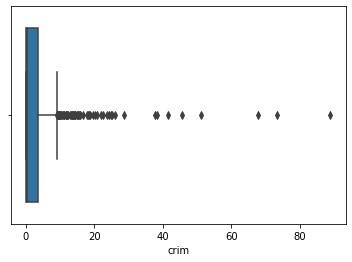

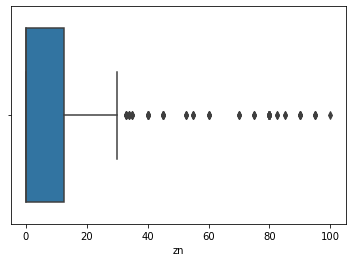

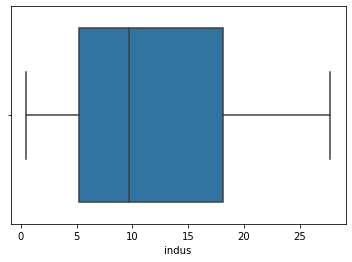

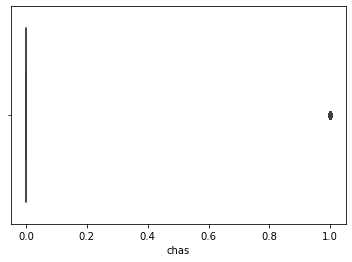

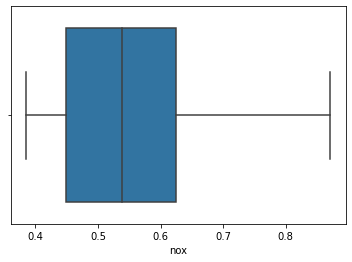

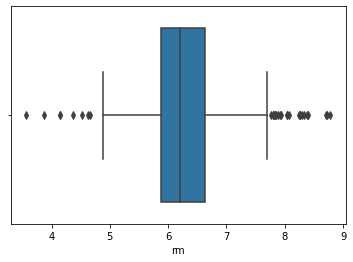

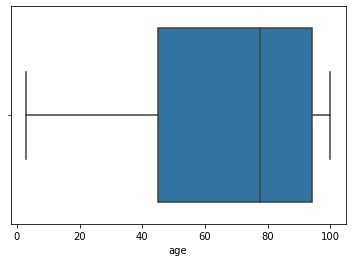

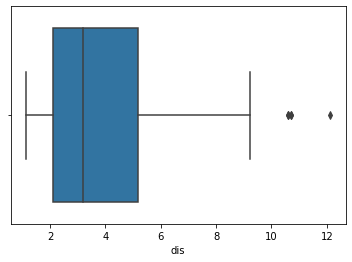

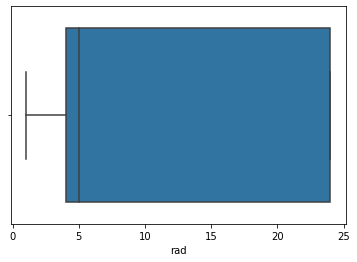

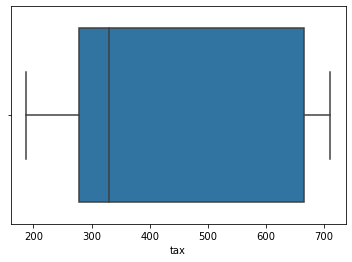

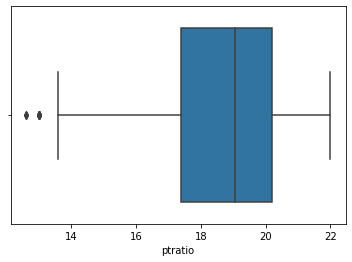

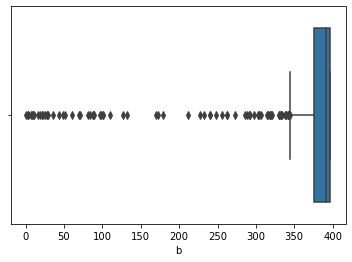

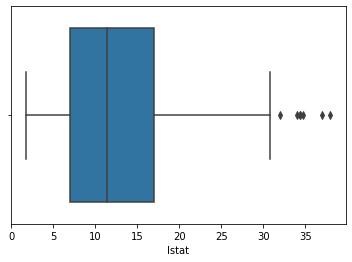

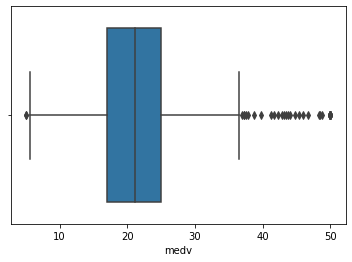

In [27]:
for col in df1:
    plt.figure()
    sns.boxplot(df1[col])
    plt.show()

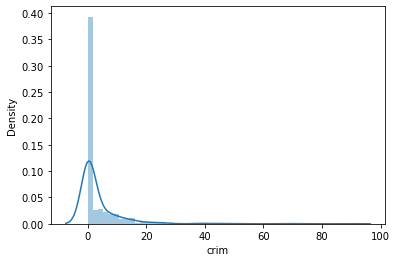

5.207652387859715


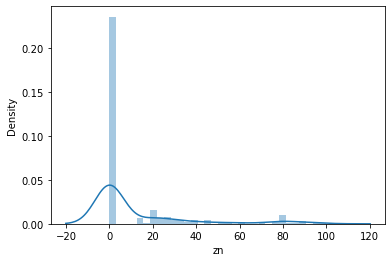

2.219063057148425


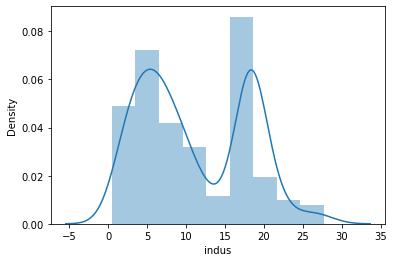

0.29414627684418543


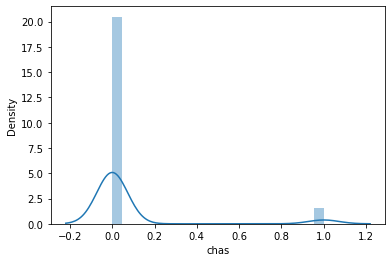

3.395799292642519


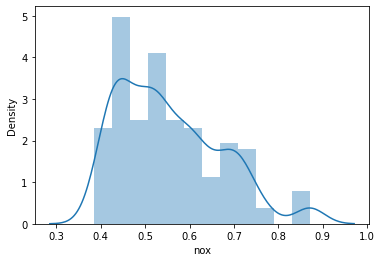

0.7271441597740318


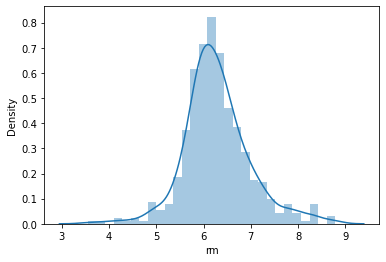

0.4024146680249623


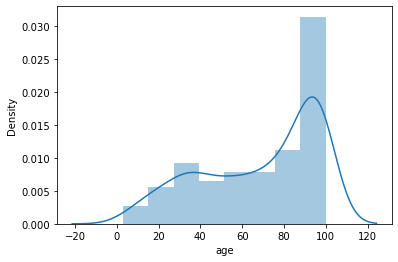

-0.5971855948016143


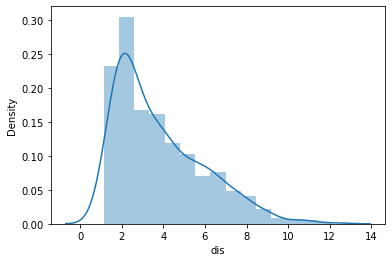

1.0087787565152246


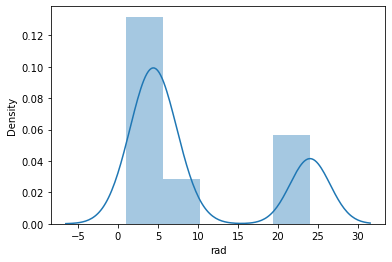

1.0018334924536951


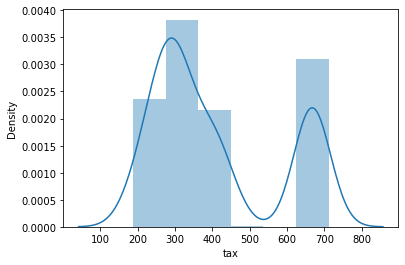

0.6679682687237768


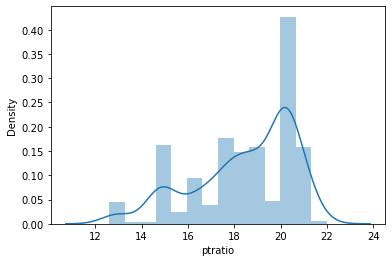

-0.7999445320367449


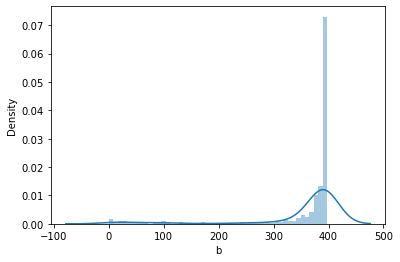

-2.8817983452627716


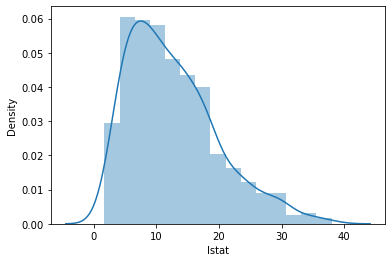

0.9037707431346133


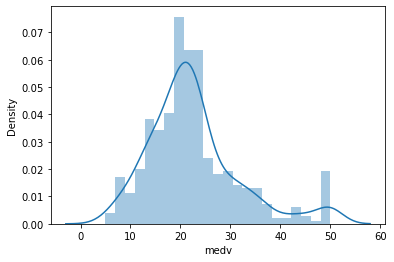

1.104810822864635


In [28]:
for col in df1:
    plt.figure()
    sns.distplot(df1[col])
    plt.show()
    print(skew(df1[col]))

In [29]:
for col in df1:
    if skew(df1[col]) > 0.5 or skew(df1[col]) < -0.5:
        #df_num[col] = np.log(df_num[col])
        df1[col] = np.sqrt(df1[col])

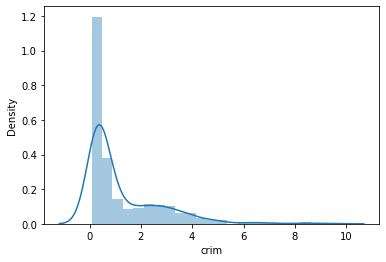

2.018376021915564


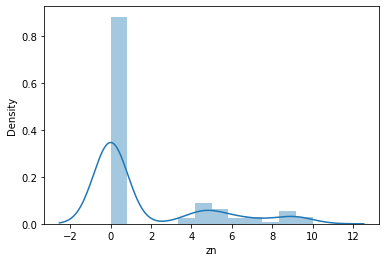

1.4719128590626676


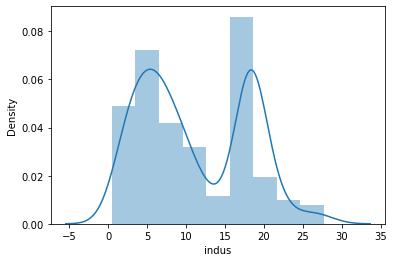

0.29414627684418543


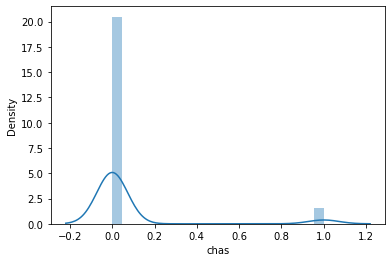

3.395799292642519


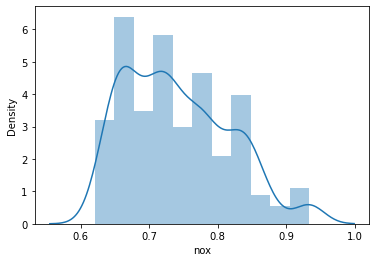

0.5351964490014817


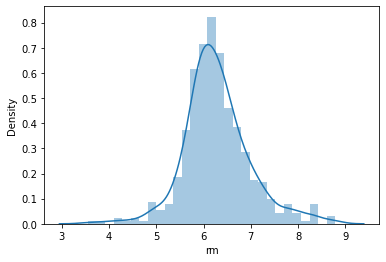

0.4024146680249623


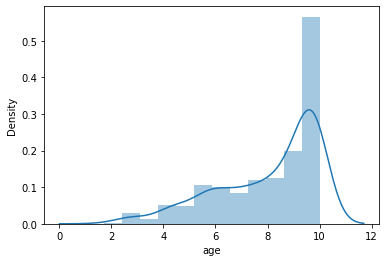

-0.974565913293527


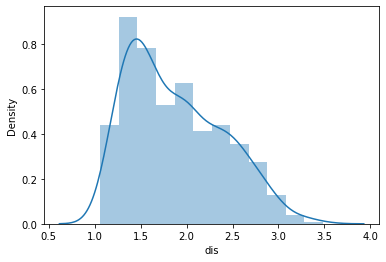

0.5627492698735238


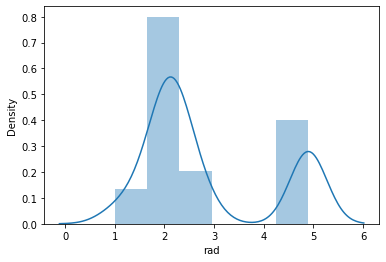

0.8213996403008884


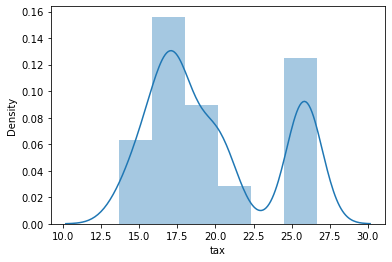

0.5202453627239406


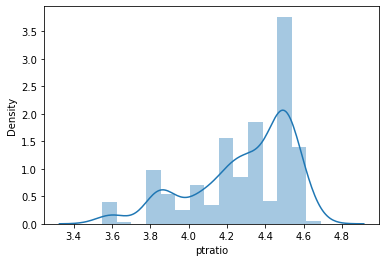

-0.9033879480391321


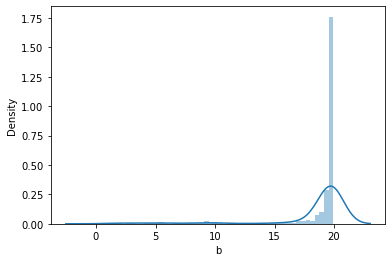

-3.3462612866359005


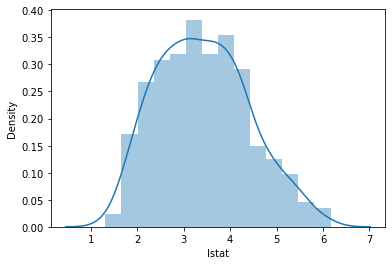

0.30647851994358943


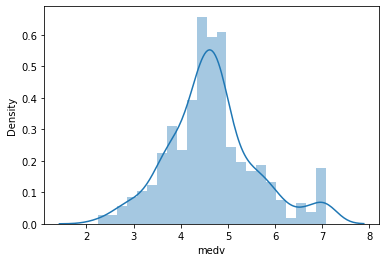

0.43763305472800307


In [30]:
for col in df1:
    plt.figure()
    sns.distplot(df1[col])
    plt.show()
    print(skew(df1[col]))

In [31]:
for col in df1:
    ss=StandardScaler()
    df[col]=ss.fit_transform(df1[[col]])

In [32]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.3,random_state = 1)

In [33]:
lr1=LinearRegression()

In [34]:
lr1.fit(X1_train,y1_train)

LinearRegression()

In [35]:
lr1.coef_

array([-1.80069743e-02,  4.99928879e-03,  6.59381226e-03,  2.41509630e-01,
       -2.25491645e+00,  2.11777408e-01,  3.76871439e-04, -1.38882678e-01,
        3.35957252e-02, -1.20143522e-03, -1.02988133e-01,  6.40723309e-04,
       -6.29404809e-02])

In [36]:
lr1.intercept_

7.638186509114096

In [37]:
y1_pred = lr1.predict(X1_test)

In [38]:
print("MSE",mean_squared_error(y1_test,y1_pred))
print("RMSE",np.sqrt(mean_squared_error(y1_test,y1_pred)))
print("MAE",mean_absolute_error(y1_test,y1_pred))
print("R2",r2_score(y1_test,y1_pred))

MSE 0.18160086192965377
RMSE 0.4261465263611259
MAE 0.32456170004599333
R2 0.8048407819640745


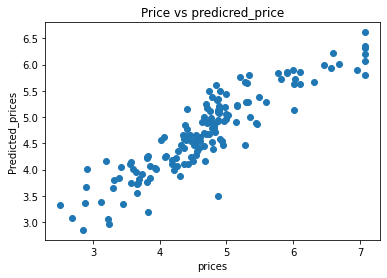

In [39]:
plt.figure()
plt.scatter(y1_test,y1_pred)
plt.xlabel("prices")
plt.ylabel("Predicted_prices")
plt.title("Price vs predicred_price")
plt.show()

# Cheaking residuals

In [40]:
residuals1=y1_test-y1_pred

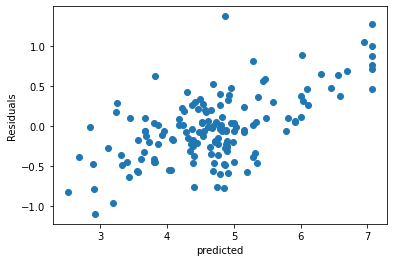

In [41]:
plt.figure()
plt.scatter(y1_test,residuals1)
plt.xlabel("predicted")
plt.ylabel("Residuals")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

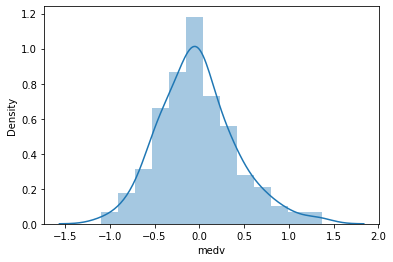

In [42]:
plt.figure()
sns.distplot(residuals1)
plt.show